## This dataset is used for the classification task of predicting whether a person has heart disease (YES/NO)

* The dataset can be found on Kaggle at the following link: [Heart Disease Dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset/data)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
car_sales = pd.read_csv("car-sales-extended.csv")

In [3]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [4]:
car_sales.describe() # Gives the basic description of all the rows and cols

,Odometer (KM),Doors,Price
count,1000.000000,1000.000000,1000.000000
mean,131073.708000,4.014000,16045.665000
std,68859.723885,0.379405,8630.794219
min,10148.000000,3.000000,2796.000000
25%,71238.000000,4.000000,9481.500000
50%,131202.000000,4.000000,14264.000000
75%,192372.750000,4.000000,20738.750000
max,249860.000000,5.000000,52458.000000


# Plotting basic graphs and checking for correlations

In [5]:
grouped = car_sales[:100].groupby("Make")
for name, group in grouped:
    print(f"Group: {name}")
    print(group)
    print()

Group: BMW
   Make Colour  Odometer (KM)  Doors  Price
1   BMW   Blue         192714      5  19943
17  BMW  White         194189      5  17177
55  BMW  White          79937      5  48686
57  BMW    Red         162176      5  19186
60  BMW    Red         208124      5  24668
65  BMW  White         178796      5  18396
69  BMW  White          37513      5  32379

Group: Honda
     Make Colour  Odometer (KM)  Doors  Price
0   Honda  White          35431      4  15323
2   Honda  White          84714      4  28343
5   Honda    Red          42652      4  23883
7   Honda  White          43120      4  20306
9   Honda   Blue          51029      4  26683
14  Honda   Blue         199833      4  18946
21  Honda   Blue          30615      4  29653
23  Honda  Green         130075      4  21242
24  Honda   Blue         172718      4  14274
25  Honda   Blue         125819      4  15686
26  Honda  White         180390      4  13344
27  Honda  Green          82783      4  10984
28  Honda  White         

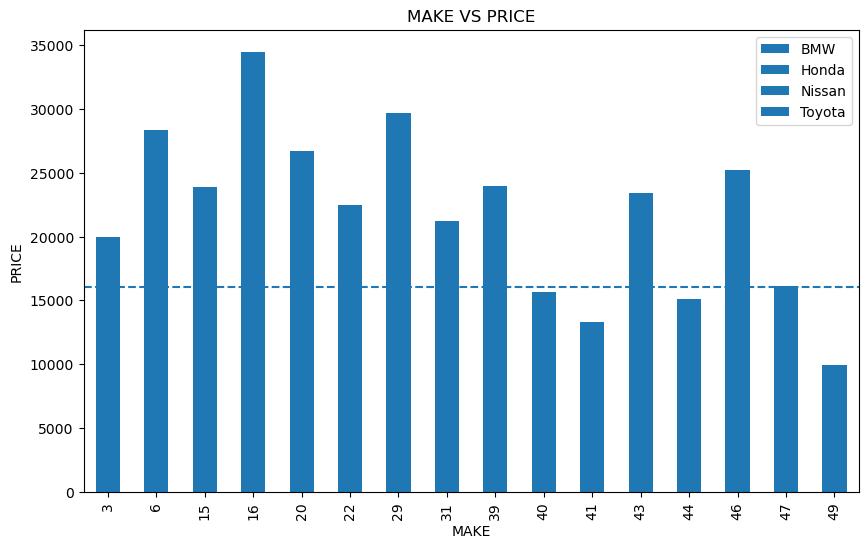

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

# Grouped bar plot
plt.figure(figsize=(10,6))
car_sales[:50].groupby('Make')['Price'].plot(kind='bar', legend=True) # I have only considered the first 50 rows

# Customize the plot
plt.xlabel("MAKE")
plt.ylabel("PRICE")
plt.title("MAKE VS PRICE")
plt.axhline(car_sales["Price"].mean(), linestyle='--')

# Show the plot
plt.show()

## Now Moving on to training our model
- For finding our perfect model, we will use the [Model Map](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) provided by scikit-learn!

![scikit-learn model map](ml_map.png)

### To Compare `accuracy`, `precision`, `recall`, `f1` for all the models, we will create a function that directly does this for us 
- `accuracy` -> In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.
- `precision` -> The precision is the ratio `tp / (tp + fp)` where `tp` is the number of true positives and `fp` the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.
- `recall` -> The recall is the ratio `tp / (tp + fn)` where `tp` is the number of true positives and `fn` the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.
- `f1` -> The F1 score can be interpreted as a harmonic mean of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0.

In [7]:
def evaluate_preds(y_true: np.array, 
                   y_preds: np.array) -> dict:
    """
    Performs evaluation comparison on y_true labels vs. y_pred labels.

    Returns several metrics in the form of a dictionary.
    """
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds, average='macro',zero_division=zero_division_value)
    recall = recall_score(y_true, y_preds, average='macro',zero_division=zero_division_value)
    f1 = f1_score(y_true, y_preds, average='macro',zero_division=zero_division_value)
    metric_dict = {"accuracy": round(accuracy, 2),
                   "precision": round(precision, 2), 
                   "recall": round(recall, 2),
                   "f1": round(f1, 2)}
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")

    return metric_dict

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [9]:
# Now let's one hot encode the features with the same code as before 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.transform(X_test)

# Check transformed and filled X_train
transformed_X_train

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.12004e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.56730e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.46824e+05],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.18760e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.86250e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [10]:
# Now we've transformed X, let's see if we can fit a model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

# Make sure to use the transformed data (filled and one-hot encoded X data)
model.fit(transformed_X_train, y_train)
model.score(transformed_X_test, y_test)

0.29444524256551574

In [11]:
y_pred = model.predict(transformed_X_test) # This is our predictions array and to verify our predictions, we must use the y_test array
y_pred[:10]

array([10927.08, 11265.72, 49340.38, 23287.85, 27914.52, 11812.27,
       11517.39, 16270.25, 12880.36,  8630.92])

In [12]:
y_test

521    13707
737    12650
740    19500
660    26880
411    41294
       ...  
408    10855
332     6460
208    33077
613     8164
78      6502
Name: Price, Length: 200, dtype: int64

In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
y_preds = y_pred.astype(int)
# Set zero_division parameter to handle zero divisions
zero_division_value = 1  # Replace zero divisions with this value
precision = precision_score(y_test, y_preds, average='macro', zero_division=zero_division_value)
recall = recall_score(y_test, y_preds, average='macro', zero_division=zero_division_value)
f1 = f1_score(y_test, y_preds, average='macro', zero_division=zero_division_value)

print("Precision (Macro):", precision)
print("Recall (Macro):", recall)
print("F1 Score (Macro):", f1)

Precision (Macro): 0.49746192893401014
Recall (Macro): 0.49746192893401014
F1 Score (Macro): 0.005076142131979695


## Improving model predictions through experimentation (hyperparameter tuning)

In [14]:
# Creating a param_grid to use with GridSearchCv
param_grid = {"n_estimators": [100,150,200, 500,1000],
              "max_depth": [20,30, 40, 50,100],
              "max_features": ["log2"],
              "min_samples_split": [2, 4, 6, 8,10],
              "min_samples_leaf": [4]}

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score

# Setup random seed
np.random.seed(42)

# Split the data into X (features/data) and y (target/labels)
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
# Now let's one hot encode the features with the same code as before 
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]

one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot", 
                                  one_hot, 
                                  categorical_features)],
                                remainder="passthrough",
                                sparse_threshold=0) # return a sparse matrix or not

# Fill train and test values separately
transformed_X_train = transformer.fit_transform(X_train)
transformed_X_test = transformer.transform(X_test)

# Check transformed and filled X_train
transformed_X_train

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.12004e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.56730e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.46824e+05],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.18760e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.86250e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [17]:
import time
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split

# Start the timer
start_time = time.time()

# Set random seed for reproducibility
np.random.seed(42)

# Define the regressor and set n_jobs to -1 to use all available machine cores
clf = RandomForestRegressor(n_jobs=-1)

# Setup GridSearchCV with 5-fold cross-validation
gs_clf = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5)

# Fit the GridSearchCV version of clf using training data
gs_clf.fit(transformed_X_train, y_train)

# Find the running time
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print("GridSearchCV fitting time:", elapsed_time, "seconds")

GridSearchCV fitting time: 121.58498334884644 seconds


In [18]:
gs_clf.best_params_

{'max_depth': 50,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [19]:
gs_clf.param_grid['n_estimators'] = [200]

In [20]:
# Max predictions with the GridSearchCV classifier
gs_clf.score(transformed_X_test, y_test)

0.4309971419625107

### We have increased the accuracy from 0.29444524256551574 to 0.4310000151435375, There is still a lot of scope for improvement!

## Saving our Random Forest Classifier Model so that we can use it later

In [21]:
import pickle

# Save an existing model to file
Ensemble_model_regression = "Ensemble_model_regression.pkl" # .pkl extension stands for "pickle"
pickle.dump(clf, open(Ensemble_model_regression, "wb"))

In [22]:
# Load a saved model
loaded_pickle_model = pickle.load(open(Ensemble_model_regression, "rb"))
loaded_pickle_model.fit(transformed_X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [23]:
# Make predictions and evaluate the loaded model
pickle_y_preds = loaded_pickle_model.predict(transformed_X_test)
# Set zero_division parameter to handle zero divisions
zero_division_value = 1  # Replace zero divisions with this value
precision = precision_score(y_test, y_preds, average='macro', zero_division=zero_division_value)
recall = recall_score(y_test, y_preds, average='macro', zero_division=zero_division_value)
f1 = f1_score(y_test, y_preds, average='macro', zero_division=zero_division_value)

print("Precision (Macro):", precision)
print("Recall (Macro):", recall)

Precision (Macro): 0.49746192893401014
Recall (Macro): 0.49746192893401014


In [24]:
from sklearn.linear_model import Lasso

# Assuming transformed_X_train, transformed_X_test, y_train, y_test are defined

# Initialize the Lasso regression model
lasso_model = Lasso(alpha=1)  # You can adjust the alpha parameter as needed

# Fit the Lasso model using the transformed training data
lasso_model.fit(transformed_X_train, y_train)

# Evaluate the model on the transformed test data
r2 = lasso_model.score(transformed_X_test, y_test)
print(r2)

0.4236029430900353
